# Lab 1 - Used Cars in the USA
#### By: David Wei, Sophia Wu, Dhruba Dey, Queena Wang

### Business Understanding:
As a team, we decided to work on a dataset which can easily be understood from our common life experience without needing specific domain knowledge such as finance, marketing and so forth. Secondly, we wanted to dabble ourselves with a dataset, that we had not previously exposed to, such as Real Estate, Life expectancy, etc. Off course, we must meet the project guidelines of 30,000 rows and 10 features, which in fact prompted us to look for somewhat large dataset with multiple features so that can effectively cull right set of features having numerical, boolean and categorical values. In addition, working with a large dataset would provide us with the experience that we have not acquired yet. This thought process of data selection has led us to grab “Used Car Dataset”, which has 3 million rows and 66 features. 
<br>
<br>
We wanted to build 3 different types of models on this dataset. First is Regression, second binary classification using Logistic Regression and third multiple classification using either K-nearest or K-means Random Forest depending on the best fit. We picked “Price” as the response feature for Regression model because it has numerical value and a pivotal point in the used car purchase. For Logistic Regression, we opted for “has_accidents” as the response variable because it has boolean values and an interesting point to observe whether we can effectively classify the used car with accidents. Finally, we used “body_type” as the target variable for multi-value classification. “Body_type” has 9 attributes which we believed a good candidate for multi-class classification. 
<br>
<br>
We applied first our domain knowledge, which is our collective experience of used car buying, to mine features that we thought would be relevant for making decision on a used car purchase. That helped us reduce the numbers of features from 66 to 40.  Then we took a close at each feature and tried to eliminate as many as possibleto keep the data size manageable so that we could handle data wrangling and model building, to be performed in the next phase, with the computing resources available to us. Also, we provided the justification as to why a feature was removed from the list of 40. However, we were cautious about categorical variable because itwould spawn to multiple variables after encoding. That is the key reason why we restricted the categorical feature to one. In the final dataset, we have 19 variables comprising 15 numerical, 1 boolean and 3 categorical. By the way, removing the missing values after sub-setting the data set to the intended features, we reduced the numbers of rows close to 700K from 3M. And we would also conduct PCA and Regularizations for dimensionality reduction. Based on the analysis and understanding of the data, we believed we selected the right set of data for the purpose of this project. 


In [1]:
#!pip install missingno
#!pip install plotnine
#pip install ptitprince

In [2]:
#importing libraries and reading in file
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #ignoring warnings

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
import ptitprince as pt

import sklearn.preprocessing as preprocessing
import sklearn.model_selection as cross_validation
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

ModuleNotFoundError: No module named 'ptitprince'

In [3]:
# NOTE: need to change file per user
#df_raw = pd.read_csv(r'C:\Data\used_cars_data.csv')
#df_raw = pd.read_csv('https://raw.githubusercontent.com/chee154/ml-Py-used_cars/main/data/kaggle_used_cars_data.csv')
df_raw = pd.read_csv('C:/Users/Queen/Documents/GitHub/ml-Py-used_cars/data/kaggle_used_cars_data.csv')

In [4]:
df_raw.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,1FTEW1CP3LFC52880,43.6 in,NaN,--,67.1 in,Pickup Truck,NaN,Huntsville,20.0,NaN,...,A,Automatic,t87709,XL SuperCrew RWD,NaN,4X2,4X2,145 in,96.8 in,2020
1,3N1CP5CV6LL501109,33.2 in,NaN,NaN,NaN,SUV / Crossover,NaN,Opelousas,31.0,NaN,...,CVT,Continuously Variable Transmission,t90150,SV FWD,NaN,FWD,Front-Wheel Drive,103.1 in,69.3 in,2020
2,5LM5J7XC5LGL29065,40.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Fort Myers,17.0,NaN,...,A,Automatic,t85101,Reserve AWD,NaN,AWD,All-Wheel Drive,119 in,89.9 in,2020
3,VB57A151926,NaN,NaN,NaN,NaN,NaN,NaN,Boerne,NaN,NaN,...,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957
4,1G1FE1R76L0144294,29.9 in,NaN,NaN,NaN,Coupe,NaN,Peoria,16.0,NaN,...,M,6-Speed Manual,t85926,1SS Coupe RWD,NaN,RWD,Rear-Wheel Drive,110.7 in,74.7 in,2020


In [5]:
print("Total # of Records: " + str(df_raw.shape[0]))
print("Total # of Columns: " + str(df_raw.shape[1]))

Total # of Records: 30000
Total # of Columns: 66


### Data Meaning Type

#### Domain based Attribute Reduction
Before we do a deep dive into the types of our data, we will first look into reducing it from a  The total dataset has 66 attributes After a quick observation of the column headers, we can deduce that not all columns will be necessary for our analysis. Reasons for removing them below:

In [6]:
#subsetting columns by referencing the column indexes
df_cln_1 = df_raw.iloc[:, np.r_[0,5,7:11,13:17,18:21,22:30,32,35:38,42:50,51,55:57,61:63,64:66]]
print(df_cln_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   30000 non-null  object 
 1   body_type             29851 non-null  object 
 2   city                  30000 non-null  object 
 3   city_fuel_economy     25067 non-null  float64
 4   combine_fuel_economy  0 non-null      float64
 5   daysonmarket          30000 non-null  int64  
 6   engine_cylinders      28994 non-null  object 
 7   engine_displacement   28227 non-null  float64
 8   engine_type           28994 non-null  object 
 9   exterior_color        30000 non-null  object 
 10  frame_damaged         15820 non-null  object 
 11  franchise_dealer      30000 non-null  bool   
 12  franchise_make        24272 non-null  object 
 13  fuel_tank_volume      28366 non-null  object 
 14  fuel_type             29156 non-null  object 
 15  has_accidents      

### Data Quality

<AxesSubplot:>

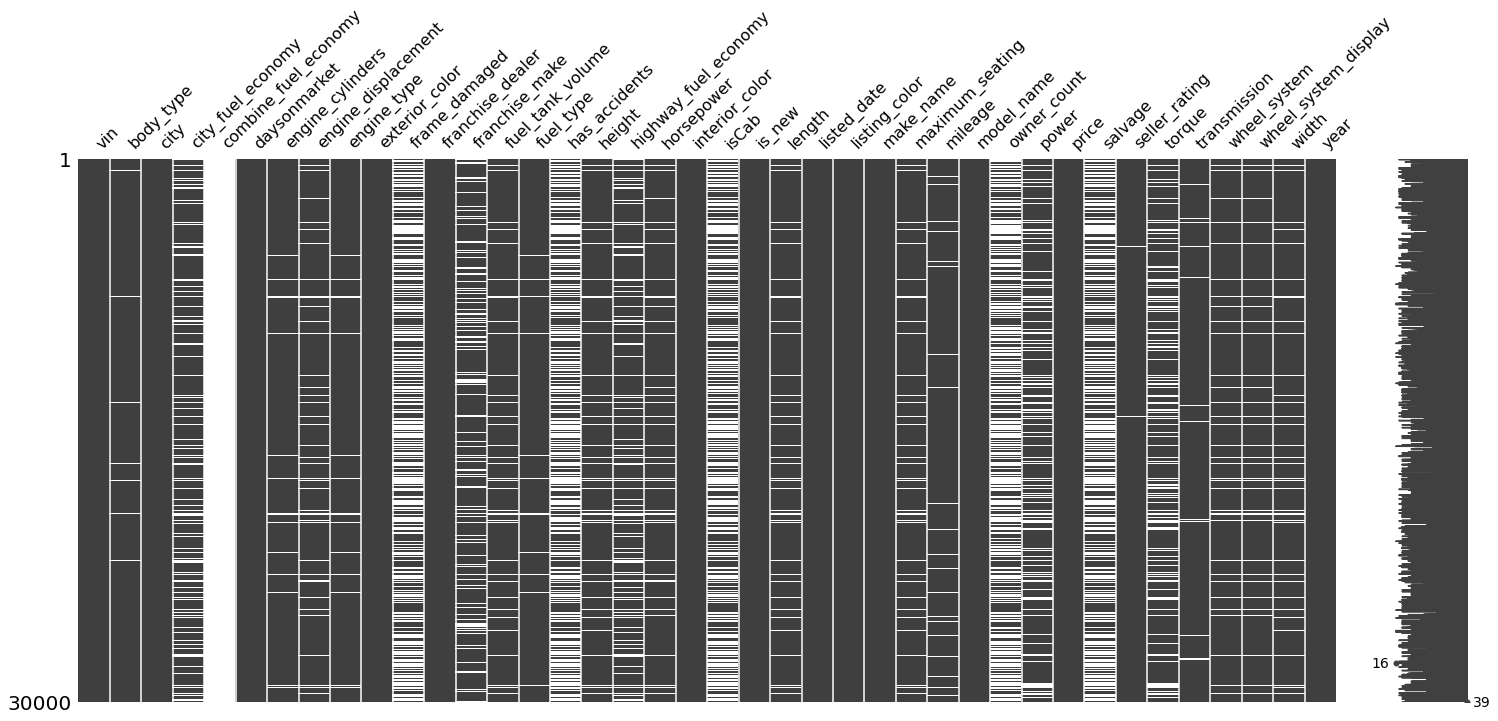

In [7]:
msno.matrix(df_cln_1)

After doing a quick profiling on some our identified columsn, we can see that both engine_cylinders and engine_type are the same. Additionally, we also found that the prefixes and suffixes attached to them are descriptive of it and thus not a continuous value. 

In [8]:
# removing city_fuel_economy since a quick vizualition of our dataset shows that ALL values are empty
df_cln_1 = df_cln_1.drop(columns='combine_fuel_economy')
print(df_cln_1.shape[1])

39


We also found that 'engine_cylinders','engine_type' contains the same data in two separate columns, so we first test if this condition is true and if it is, we will remove one.

In [9]:
#observing if 'engine_cylinders','engine_type' is the same data
if df_cln_1['engine_cylinders'].equals(df_cln_1['engine_type']) == True:
    df_cln_1 = df_cln_1.drop(columns='engine_cylinders')
    print(df_cln_1.shape[1])

38


We also found additional columns that were simply descriptions of another columns, for example. The 'wheel_system_display' attribute is simply a longer, more descriptive version of the 'wheel_system' attribute ("Front-Wheel Drive" vs "FWD"). For columns that follow this trend, we will remove the descriptive column from our dataset. 

In [10]:
print(df_cln_1[['wheel_system']])
print(df_cln_1[['wheel_system_display']])
df_cln_1 = df_cln_1.drop(columns='wheel_system_display')
print(df_cln_1.shape[1])

      wheel_system
0              4X2
1              FWD
2              AWD
3              NaN
4              RWD
...            ...
29995          4WD
29996          FWD
29997          NaN
29998          FWD
29999          AWD

[30000 rows x 1 columns]
      wheel_system_display
0                      4X2
1        Front-Wheel Drive
2          All-Wheel Drive
3                      NaN
4         Rear-Wheel Drive
...                    ...
29995     Four-Wheel Drive
29996    Front-Wheel Drive
29997                  NaN
29998    Front-Wheel Drive
29999      All-Wheel Drive

[30000 rows x 1 columns]
37


We also discussed that 'interior_color' attribute has 45,726 distinct color values and so due to the sheer volume and complexity (# of levels in this attribute). We also decided to remove it from our dataset since it is unrealistic for the type of modeling we are doing and would effect the overall performance of our model.

In [11]:
#note this plot takes forever to run
#(ggplot(df_cln_1)+aes(x="interior_color", y="price")+geom_line())

In [12]:
print(df_cln_1['interior_color'].nunique())

df_cln_1 = df_cln_1.drop(columns='interior_color')
print(df_cln_1.shape[1])

2906
36


Another attribute we found that could be removed as the "listed_date" attribute. Since there was no other 'datetype' attributes available in our dataset, we didn't really see a point with keeping it as there was no other data reference to use it with. Additionally, the attribute 'daysonmarket' already pre-aggregated the number of days it took to sell a vehicle, which the listed date would've been used for otherwise. Because of this, we will also remove it from our dataframe.

In [13]:
df_cln_1 = df_cln_1.drop(columns='listed_date')
print(df_cln_1.shape[1])

35


At this point, we decided to take a break from subsetting our data and take a look at the amount of missing values in the current dataframe. Our intention in mind was to see what the data looked like after it was cleaned to further proceed reducing the amount of attributes we had.

### Data Cleaning - Duplicates, Missing Data,  Nulls
Now that our datatypes have been adjusted. We will work on cleaning up any empty data in our dataset. To begin, we will check if any of the VINs have duplicates in the dataset, since this the VIN is unique to a car we are expecting there shouldn't be, but in cases there is, we will remove it.

In [14]:
df_cln_1[df_cln_1.duplicated(['vin'], keep=False)].sort_values('vin')

,vin,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,exterior_color,frame_damaged,franchise_dealer,...,owner_count,power,price,salvage,seller_rating,torque,transmission,wheel_system,width,year


We can see that that there are duplicates even though the 'vin' should be specific and distinct to each car. There is a total of 80 records that contain duplicates. We will then remove these duplicates while keeping the 'first' record so that one copy of the duplcites will remain. We can see that after we cleaned these duplicates, our total # of records drop from 3,000,040 to 3,000,000. 

In [15]:
print(df_cln_1.shape[0])

30000


In [16]:
df_cln_1 = df_cln_1.drop_duplicates(subset=['vin'], keep='first')
print("# of records after removing duplicates: "+str(df_cln_1.shape[0]))

# of records after removing duplicates: 30000


After we have cleaned our duplicates. A quick visualization of our data shows that almost every column has empty values. We will focus on analyzing those that have a large amount of empty data (ex. Frame_Damaged, has_accidents, isCab, etc.)

<AxesSubplot:>

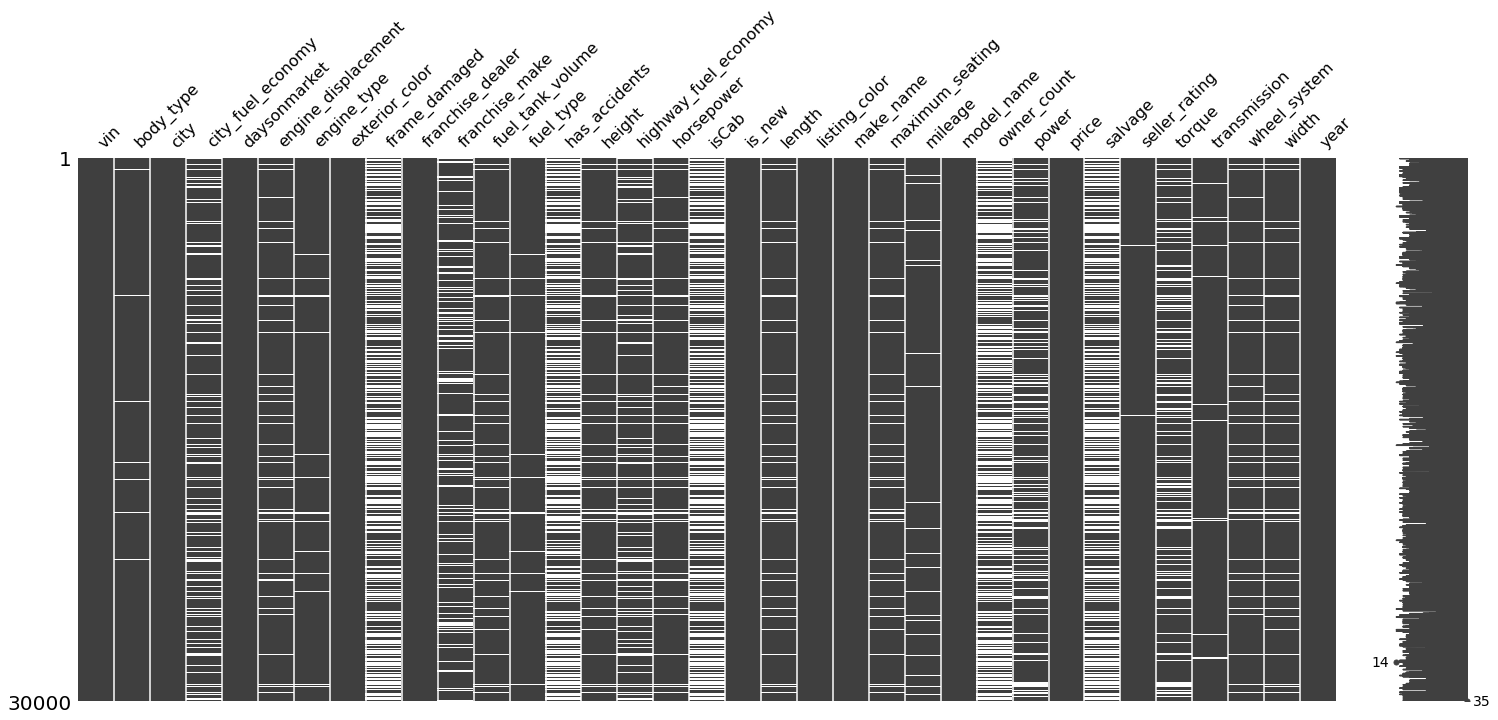

In [17]:
#visualizatin of our data BEFORE removing all rows with missing data
msno.matrix(df_cln_1)

In [18]:
# remove the missing values
df_cln_2 = df_cln_1.dropna()
print(len(df_cln_2))

6990


In [19]:
# checking the row counts of columns to see the missing rows
df_cln_2.count()

vin                     6990
body_type               6990
city                    6990
city_fuel_economy       6990
daysonmarket            6990
engine_displacement     6990
engine_type             6990
exterior_color          6990
frame_damaged           6990
franchise_dealer        6990
franchise_make          6990
fuel_tank_volume        6990
fuel_type               6990
has_accidents           6990
height                  6990
highway_fuel_economy    6990
horsepower              6990
isCab                   6990
is_new                  6990
length                  6990
listing_color           6990
make_name               6990
maximum_seating         6990
mileage                 6990
model_name              6990
owner_count             6990
power                   6990
price                   6990
salvage                 6990
seller_rating           6990
torque                  6990
transmission            6990
wheel_system            6990
width                   6990
year          

<AxesSubplot:>

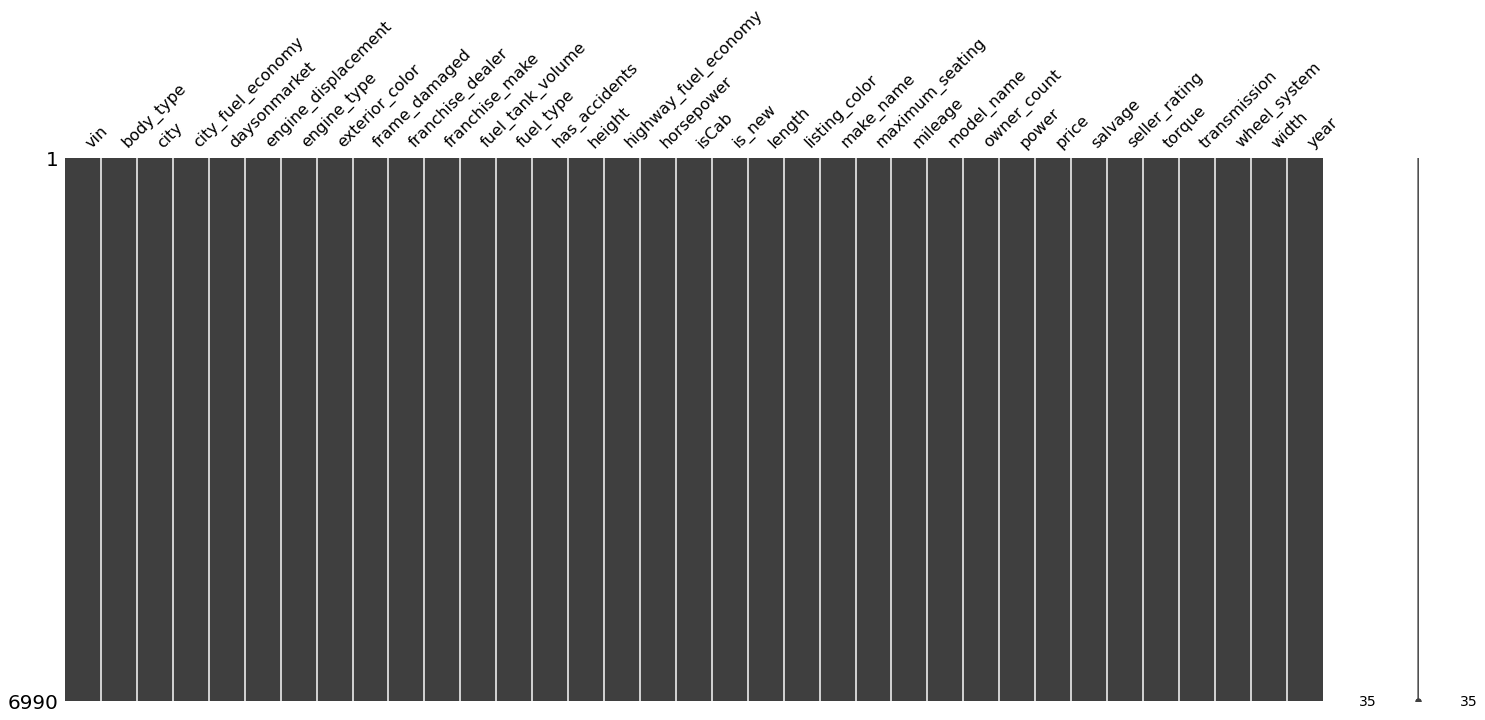

In [20]:
#visualizatin of our data AFTER removing all rows with missing data
msno.matrix(df_cln_2)

We decided that since our original dataset was large (10gb with 3million records), that instead of imputing data based on the mean or other statistical types, that deleting all records with empty values still returned 700,000 total records that not only provides plenty of data leftover, but also raw data that isn't imputed. 

### Data Cleaning - Datatypes
Obviously at this point we need to convert a few of our data columns to the appropriate data type by removing parts of the value string that we do not need such as "gal" in the ful_tank_volume

In [21]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning = ['engine_type','exterior_color','frame_damaged','franchise_dealer','franchise_make','fuel_tank_volume','fuel_type','has_accidents','height','isCab','is_new','length','listing_color','make_name','maximum_seating','model_name','power','salvage','torque','transmission','wheel_system','width']
for col in columns_that_need_cleaning:
        print(df_cln_2[col].unique())

['I4' 'V8' 'V6' 'V6 Flex Fuel Vehicle' 'V8 Flex Fuel Vehicle' 'H4' 'I6'
 'I5' 'H6' 'I4 Flex Fuel Vehicle' 'I4 Diesel' 'I6 Diesel' 'I3' 'V12'
 'V6 Biodiesel' 'W12' 'V6 Diesel' 'I4 Hybrid']
['granite crystal metallic clearcoat' 'Alien II' 'Black' ...
 'Oceanus Pearl' 'Phantom Gray Metallic' 'RED ALERT']
[False True]
[ True]
['Ford' 'Jeep' 'Chevrolet' 'Subaru' 'Kia' 'Nissan' 'Mazda' 'Lexus' 'Honda'
 'INFINITI' 'Hyundai' 'Buick' 'BMW' 'Toyota' 'Aston Martin'
 'Mercedes-Benz' 'Cadillac' 'Volkswagen' 'RAM' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Genesis' 'Lincoln' 'Dodge' 'Rolls-Royce' 'Chrysler'
 'Porsche' 'Land Rover' 'Audi' 'FIAT' 'Acura' 'GMC' 'Scion' 'Maserati'
 'Lamborghini' 'Lotus' 'MINI' 'Alfa Romeo' 'Bentley' 'Ferrari']
['13.5 gal' '14.2 gal' '26 gal' '18.8 gal' '19.5 gal' '15.9 gal'
 '18.5 gal' '15.5 gal' '14.5 gal' '22.4 gal' '20.1 gal' '17.4 gal'
 '16.4 gal' '15.6 gal' '13.2 gal' '19 gal' '14.8 gal' '15.1 gal'
 '23.3 gal' '14 gal' '22 gal' '21.1 gal' '18.1 gal' '12.4 gal' '16.9 gal'
 '13

In [22]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning_2 = ['fuel_tank_volume','height','length','maximum_seating','width',]
for col in columns_that_need_cleaning_2:
        print(df_cln_2[col].unique())

['13.5 gal' '14.2 gal' '26 gal' '18.8 gal' '19.5 gal' '15.9 gal'
 '18.5 gal' '15.5 gal' '14.5 gal' '22.4 gal' '20.1 gal' '17.4 gal'
 '16.4 gal' '15.6 gal' '13.2 gal' '19 gal' '14.8 gal' '15.1 gal'
 '23.3 gal' '14 gal' '22 gal' '21.1 gal' '18.1 gal' '12.4 gal' '16.9 gal'
 '13 gal' '24 gal' '15.7 gal' '32 gal' '23 gal' '18.6 gal' '28.3 gal'
 '21 gal' '16 gal' '18.3 gal' '24.6 gal' '15.4 gal' '20 gal' '16.2 gal'
 '12.2 gal' '21.5 gal' '19.2 gal' '18 gal' '17 gal' '27.6 gal' '31 gal'
 '17.2 gal' '22.5 gal' '20.3 gal' '15.8 gal' '15.3 gal' '33.5 gal'
 '16.5 gal' '21.7 gal' '16.6 gal' '26.4 gal' '10.6 gal' '23.7 gal'
 '23.8 gal' '19.8 gal' '19.4 gal' '16.1 gal' '13.6 gal' '12.8 gal'
 '18.4 gal' '14.9 gal' '14.3 gal' '15 gal' '22.2 gal' '12.7 gal'
 '27.7 gal' '11.9 gal' '16.3 gal' '10.8 gal' '19.3 gal' '17.1 gal'
 '16.8 gal' '20.5 gal' '11.8 gal' '36 gal' '17.7 gal' '38 gal' '17.3 gal'
 '11.6 gal' '17.5 gal' '13.7 gal' '27 gal' '9.2 gal' '19.1 gal' '30 gal'
 '17.8 gal' '11.4 gal' '10.5 gal' '

Regarding fuel_tank_volume and maximum_seating, we can see that there appears to be a pattern in the suffixes, "gal" and "seats" accordingly. We will now remove them and then convert all values to numeric.

In [23]:
#removing unecesary string values in columns
#then cleaning up any values that contain '--' and replacing it with NaN
#Lastly, converting the value first to a string type and then to a float type

df_cln_2['fuel_tank_volume']=df_cln_2['fuel_tank_volume'].astype(str).str.replace(' gal', '').replace('--',np.NaN).astype(float)
df_cln_2['height']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['length']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['maximum_seating']=df_cln_2['maximum_seating'].astype(str).str.replace(' seats', '').replace('--',np.NaN).astype(float)
df_cln_2['width']=df_cln_2['width'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)

In [24]:
#doing a quick profile on the subsetted columns
print(df_cln_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 8 to 29999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   6990 non-null   object 
 1   body_type             6990 non-null   object 
 2   city                  6990 non-null   object 
 3   city_fuel_economy     6990 non-null   float64
 4   daysonmarket          6990 non-null   int64  
 5   engine_displacement   6990 non-null   float64
 6   engine_type           6990 non-null   object 
 7   exterior_color        6990 non-null   object 
 8   frame_damaged         6990 non-null   object 
 9   franchise_dealer      6990 non-null   bool   
 10  franchise_make        6990 non-null   object 
 11  fuel_tank_volume      6987 non-null   float64
 12  fuel_type             6990 non-null   object 
 13  has_accidents         6990 non-null   object 
 14  height                6989 non-null   float64
 15  highway_fuel_economy

We can now see that all of our column values have been adjusted to the correct datatypes. We will next proceed with cleaning up the remainder of our data attributes. A quick count on our datatypes shows us that we still have 19 categorical values, 14 numerical types and 2 booleans (true/false) left to work wikth. Since our ultimate goal is doing a regression and one classification model, we will next work on trimming down our 'object' categorical data types.

In [25]:
#count of datatypes in current dataframe.
print(df_cln_2.dtypes.value_counts())
print("---------------------------------------------")
#showing only the object type columns
print(df_cln_2.select_dtypes(include='object').columns)

object     18
float64    13
bool        2
int64       2
dtype: int64
---------------------------------------------
Index(['vin', 'body_type', 'city', 'engine_type', 'exterior_color',
       'frame_damaged', 'franchise_make', 'fuel_type', 'has_accidents',
       'isCab', 'listing_color', 'make_name', 'model_name', 'power', 'salvage',
       'torque', 'transmission', 'wheel_system'],
      dtype='object')


After the team decided to choose 'body_type' as main the main classification term. We decided to create a final dataframe with only the attributes we found useful for our model which excludes:
- **'vin'**: acts as primary index but not useful for modeling
<br>
- **'city'**: no model of ours will require geographic features, also since there is not state or zip attributes, it is ambiguous
<br>
- **'engine_type'**: use for EDA but 'horsepower' is the continous version of this attribute
<br>
- **'franchise_dealer'**: not useful for our model 
<br>
- **'franchise_make'**: same as 'make_name' which has too many levels as a categorical value and not necessary for our predictin model
<br>
- **'fuel_tank_volume'**: 
<br>
- **'fuel_type'**: 
<br>
- **'isCab'**:
<br>
- **'listing_color'**: 
<br>
- **'make_name'**: 
<br>
- **'model_name'**: 
<br>
- **'power'**: 'horsepower' attribute will be used instead
<br>
- **'salvage'**: the value that is associated with depreciation number which is more of accounting. In real world, we pay what is the market value of the car.
<br>
- **'torque'**:  'horsepower' attribute will be used instead
<br>
- **'transmission'**: 
<br>
- **'wheel_system'**: 

In [26]:
df_cln_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 8 to 29999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   6990 non-null   object 
 1   body_type             6990 non-null   object 
 2   city                  6990 non-null   object 
 3   city_fuel_economy     6990 non-null   float64
 4   daysonmarket          6990 non-null   int64  
 5   engine_displacement   6990 non-null   float64
 6   engine_type           6990 non-null   object 
 7   exterior_color        6990 non-null   object 
 8   frame_damaged         6990 non-null   object 
 9   franchise_dealer      6990 non-null   bool   
 10  franchise_make        6990 non-null   object 
 11  fuel_tank_volume      6987 non-null   float64
 12  fuel_type             6990 non-null   object 
 13  has_accidents         6990 non-null   object 
 14  height                6989 non-null   float64
 15  highway_fuel_economy

In [27]:
#creating final df for analysis
df_final = df_cln_2.iloc[:, np.r_[1,3:6,8,13,14:17,18:20,22:24,25,27,29,33:35]]
print(df_final.info())
print(df_final.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 8 to 29999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             6990 non-null   object 
 1   city_fuel_economy     6990 non-null   float64
 2   daysonmarket          6990 non-null   int64  
 3   engine_displacement   6990 non-null   float64
 4   frame_damaged         6990 non-null   object 
 5   has_accidents         6990 non-null   object 
 6   height                6989 non-null   float64
 7   highway_fuel_economy  6990 non-null   float64
 8   horsepower            6990 non-null   float64
 9   is_new                6990 non-null   bool   
 10  length                6989 non-null   float64
 11  maximum_seating       6989 non-null   float64
 12  mileage               6990 non-null   float64
 13  owner_count           6990 non-null   float64
 14  price                 6990 non-null   float64
 15  seller_rating       

### Simple Statistics

##### Look at the final data, we have total 18 columns, their data types are: bool(1), float64(12), int64(2), object(3).

As our main goal is to predict car price and car type,in the simple statistics we need to find out the 5 most significant attributes that affect the car price, which's divided to below 5 steps:
<br>
<br>
1.Check the data range, mode, mean, median, variance and counts, etc
<br>
2.Check data normality
<br>
3.Correlation check
<br>
4.With the result from correlation checking,the 5 most significan attributes are horsepower(0.629),mileage(-0.43),highway_fuel_economy(-0.401), year(0.371) and engine_displacement(0.427)
<br>
<br>
An intresting thing we found is that the seller_rating and owner_count don't show strong relationship to car price from correlation checking, they're only -0.219 and -0.035
![title](img/correlationPic.png)

#### Median, Standard Deviation, Mean in a Pandas Dataframe
We can see from observing the simple statistic is that the median price aligns with the IQR as most of the cars are priced at around $21,700. However, what's interesting to note here is that the though the median and the mean are somewhat similar, there is a standard deviation of about \\$15,878. This could be due to the fact that the extremities in car pricing varies greatly from the average with the lost car priced at \\$484 while the highest price car is at \\$3,299,995

In [28]:
print(df_final['price'].aggregate([np.median, np.std, np.mean]).reset_index())
print('min: '+str(df_final['price'].min()))
print('min: '+str(df_final['price'].max()))

    index         price
0  median  21500.000000
1     std  13363.107872
2    mean  24261.260801
min: 900.0
min: 378888.0


#### Inter-quartile Range

In [29]:
print(df_final.describe()['price'][['25%', '50%', '75%']])
print(df_final.max()['price'])

25%    16200.0
50%    21500.0
75%    29995.0
Name: price, dtype: float64
378888.0


We can also see that our dataset has the majority (~99%) of our cars being used cars as described in the title, with less than 1% being new.

In [30]:
#check the count of new cars
print('count of new cars: '+str(df_final['is_new'].values.sum()))
print('count of used cars: '+str((~df_final['is_new']).values.sum()))

count of new cars: 5
count of used cars: 6985


We then looked into the number of different types'cars that have accidents or no accidents. We found that 84706 cars have accidents and out of that, Suv/Crossover and Sedan cars have higher numbers of accidents, as their count are larger too. Perhaps we could say love SUV and Sedan cars more than others.

In [31]:
#check the count of cars have accidents
print(df_final['has_accidents'].values.sum())

837


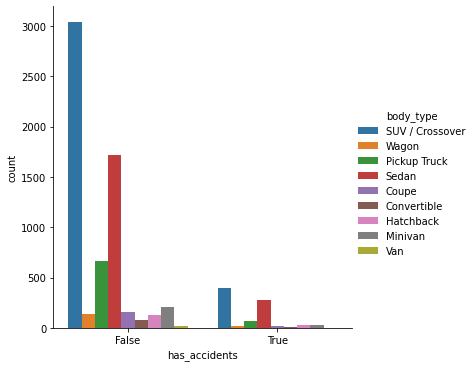

In [32]:
#Visulize the number of different type of cars that have accidents or not.
sns.catplot(x="has_accidents", kind="count",hue='body_type', data=df_final)

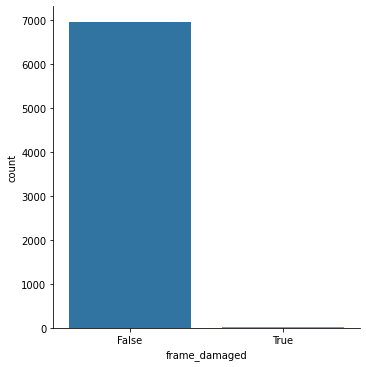

In [33]:
#Visualize the number of frame damaged cars
sns.catplot(x="frame_damaged", kind="count", data=df_final)

In [34]:
#check the count of frame_damaged cars
df_final['frame_damaged'].values.sum()

23

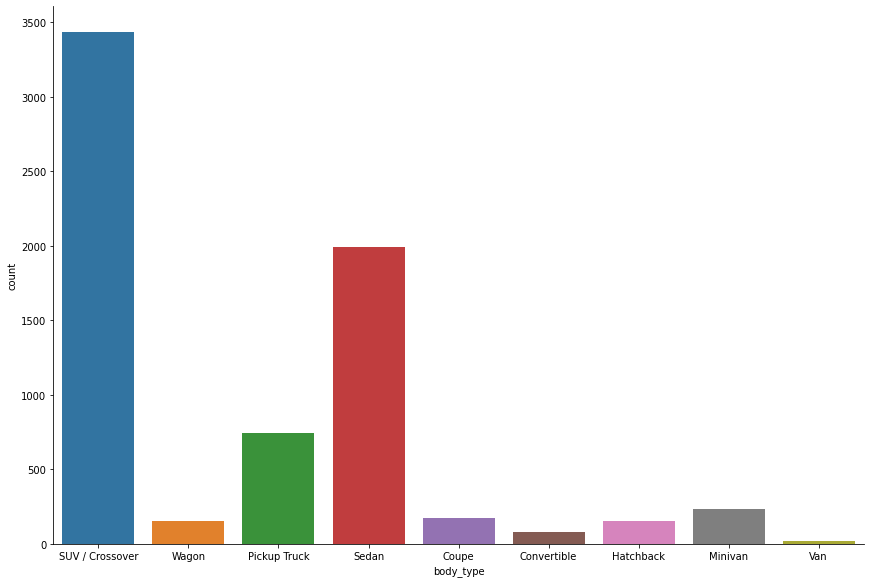

In [35]:
# check the number of different type of cars,it looks like SUV is the most popular car with almost 3500, Sedan is the 2nd most popular car.
sns.catplot(x="body_type", kind="count",data=df_final,height=8, aspect=1.5)

### Data normality check

In [36]:
##select all numberical data type from the final data
df_final_num=df_final.iloc[:, np.r_[1:4,6:9,10:18]]
print(df_final_num.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 8 to 29999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city_fuel_economy     6990 non-null   float64
 1   daysonmarket          6990 non-null   int64  
 2   engine_displacement   6990 non-null   float64
 3   height                6989 non-null   float64
 4   highway_fuel_economy  6990 non-null   float64
 5   horsepower            6990 non-null   float64
 6   length                6989 non-null   float64
 7   maximum_seating       6989 non-null   float64
 8   mileage               6990 non-null   float64
 9   owner_count           6990 non-null   float64
 10  price                 6990 non-null   float64
 11  seller_rating         6990 non-null   float64
 12  width                 6989 non-null   float64
 13  year                  6990 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 1.1 MB
None


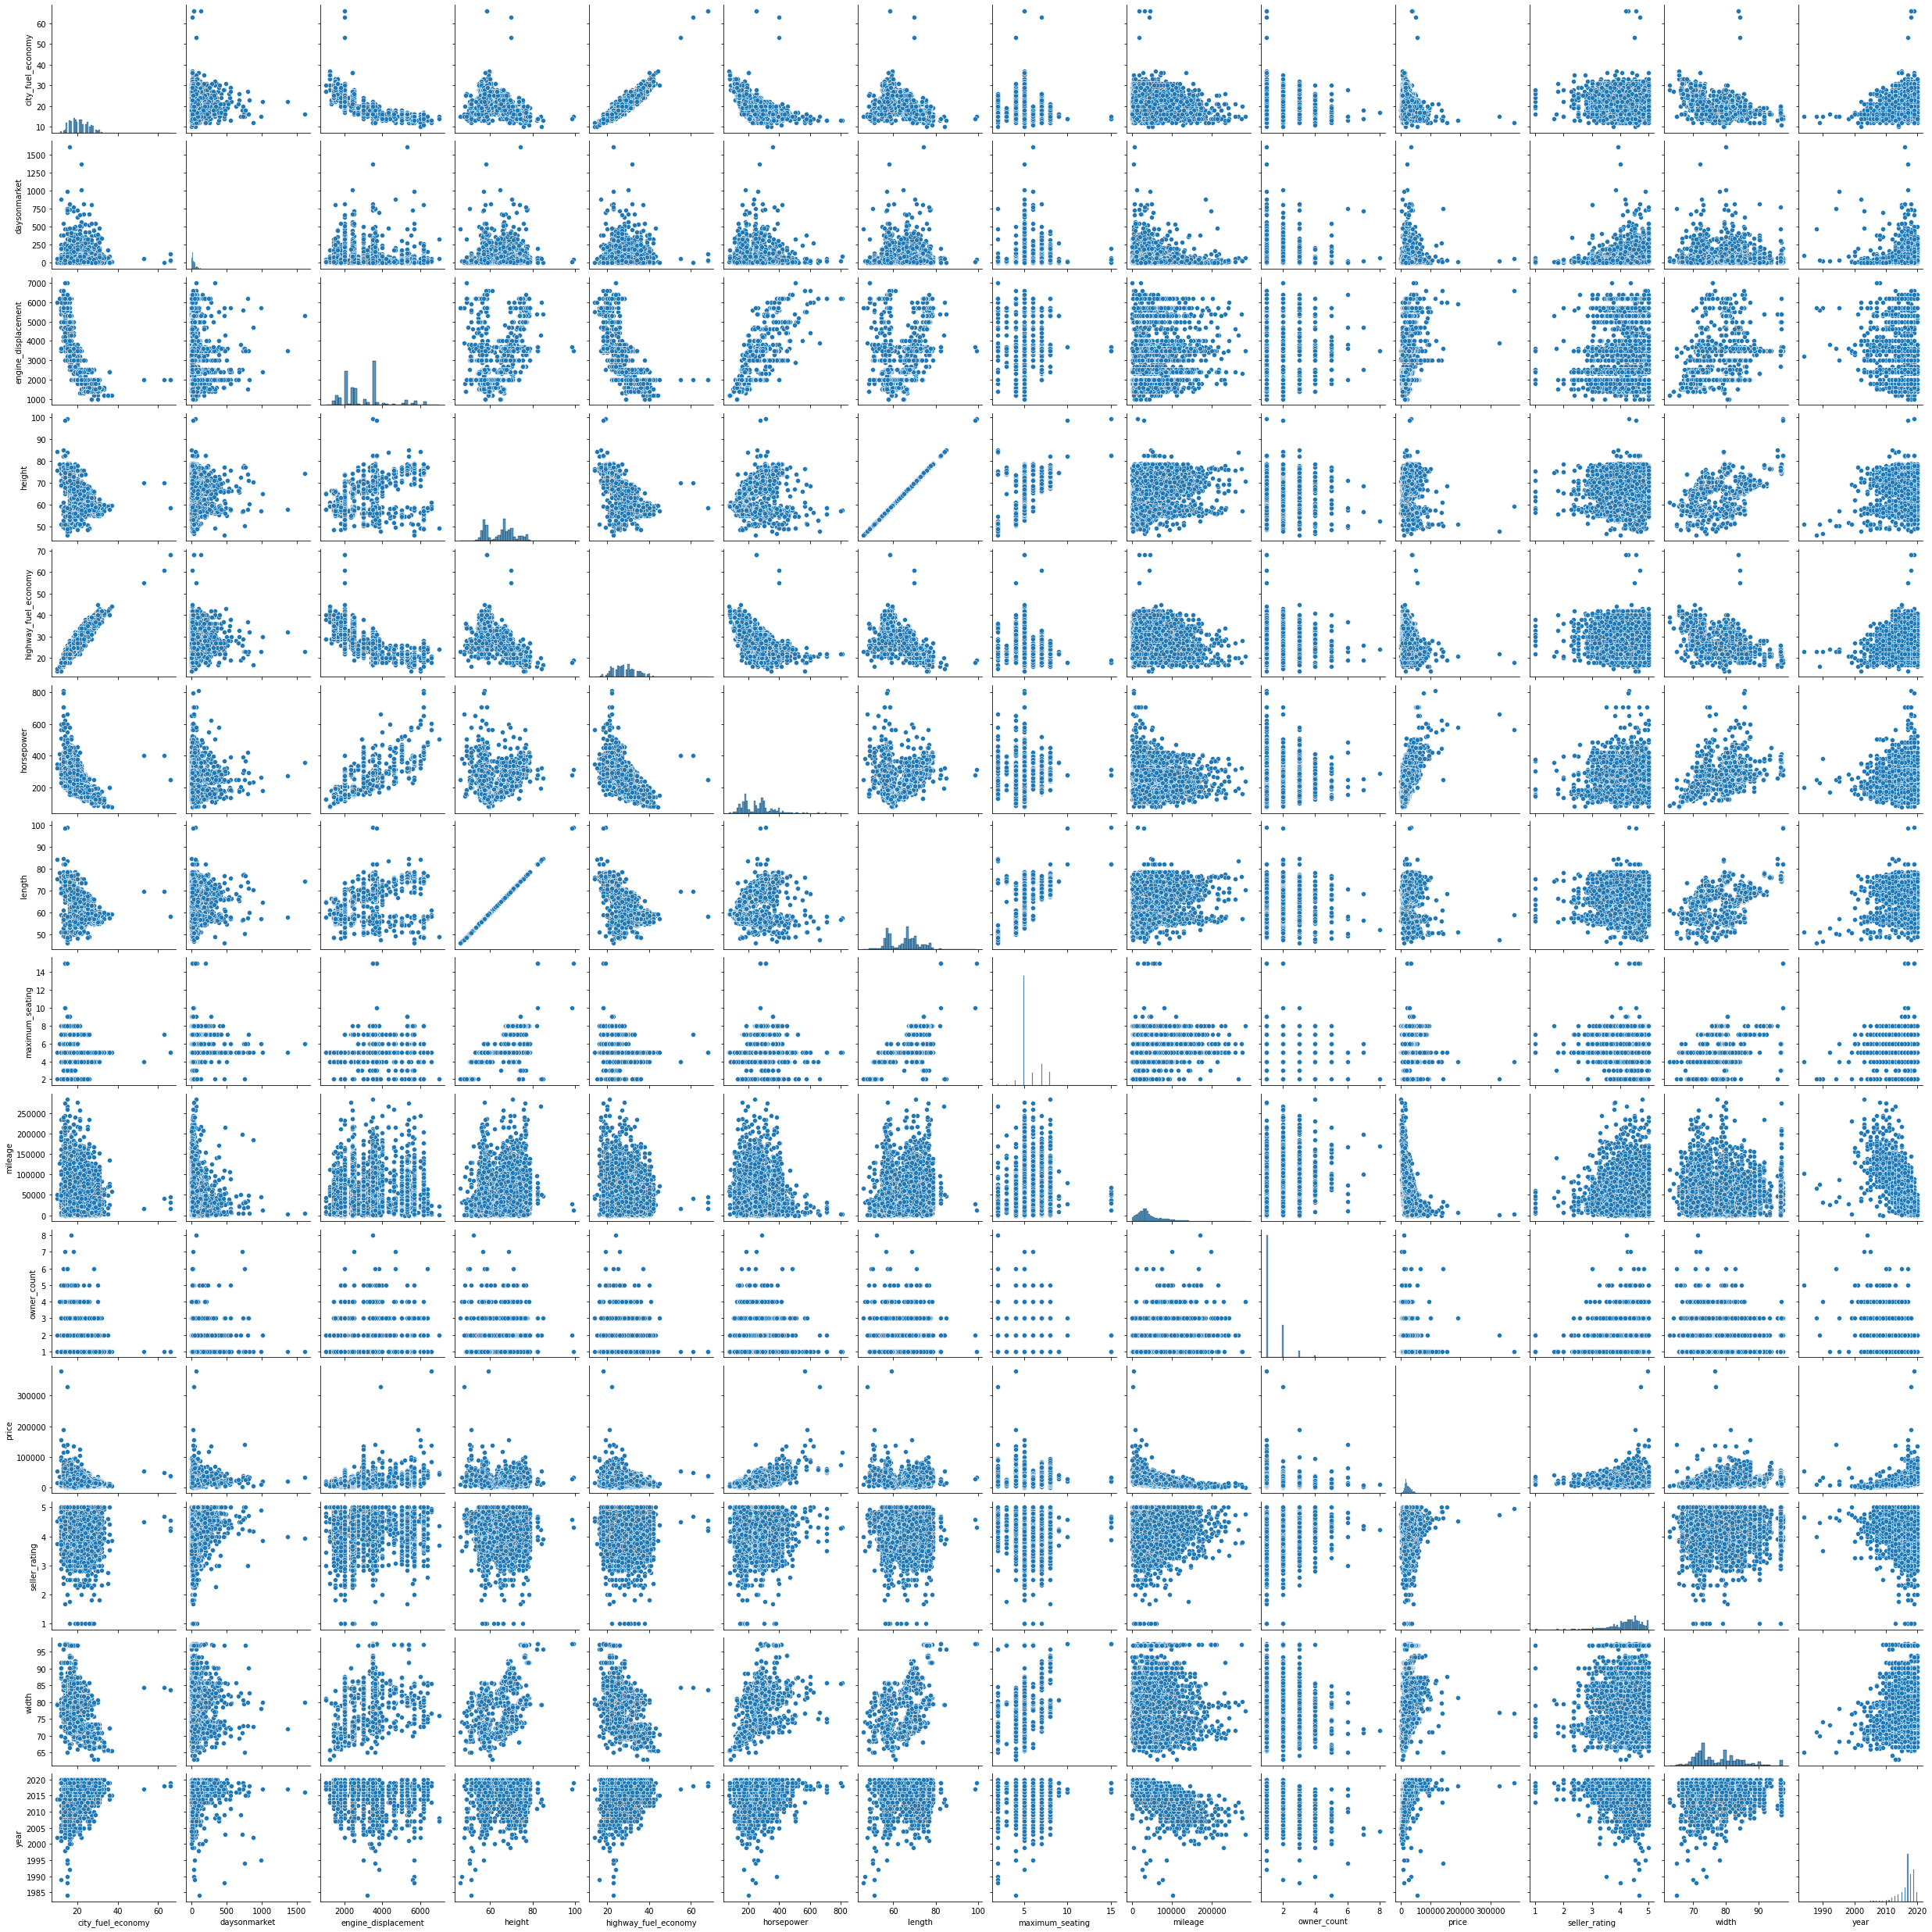

In [37]:
##check all numerical type data's normality with pairplot
sns.pairplot(df_final_num)

#### From the histogram, we may easily see  city_fuel_economy,engine_displacement and highway_fuel_economy more normally distributed than other columns. As our sample size is large enough,we use Central Limit Theorem rule and assume they're approximately normal.

### Correlation check

In [38]:
##data correlation with Spearman method
df_final.corr(method='spearman')

,city_fuel_economy,daysonmarket,engine_displacement,height,highway_fuel_economy,horsepower,is_new,length,maximum_seating,mileage,owner_count,price,seller_rating,width,year
city_fuel_economy,1.000000,0.008840,-0.852678,-0.658415,0.944125,-0.841853,-0.007569,-0.658415,-0.473122,-0.148380,-0.107991,-0.447934,-0.047096,-0.623731,0.112340
daysonmarket,0.008840,1.000000,-0.032723,0.010179,0.004459,0.001157,0.041508,0.010179,0.011427,-0.130236,-0.066482,0.036703,0.014565,0.056217,0.151666
engine_displacement,-0.852678,-0.032723,1.000000,0.586745,-0.774985,0.806029,-0.014556,0.586745,0.458202,0.124191,0.081813,0.426333,0.005844,0.490428,-0.074607
height,-0.658415,0.010179,0.586745,1.000000,-0.754063,0.519229,0.001276,1.000000,0.646353,0.078882,-0.038118,0.394775,0.017831,0.530994,0.053266
highway_fuel_economy,0.944125,0.004459,-0.774985,-0.754063,1.000000,-0.770382,-0.014630,-0.754063,-0.482291,-0.100174,-0.058837,-0.482635,-0.048400,-0.580608,0.050865
horsepower,-0.841853,0.001157,0.806029,0.519229,-0.770382,1.000000,0.002814,0.519229,0.396549,-0.019428,0.004039,0.649198,0.043606,0.667565,0.049586
is_new,-0.007569,0.041508,-0.014556,0.001276,-0.014630,0.002814,1.000000,0.001276,0.018109,-0.033176,-0.015427,0.030113,-0.005631,0.019948,0.039852
length,-0.658415,0.010179,0.586745,1.000000,-0.754063,0.519229,0.001276,1.000000,0.646353,0.078882,-0.038118,0.394775,0.017831,0.530994,0.053266
maximum_seating,-0.473122,0.011427,0.458202,0.646353,-0.482291,0.396549,0.018109,0.646353,1.000000,0.094126,-0.041291,0.245436,-0.001454,0.367443,0.067320
mileage,-0.148380,-0.130236,0.124191,0.078882,-0.100174,-0.019428,-0.033176,0.078882,0.094126,1.000000,0.465074,-0.520918,-0.003430,-0.041002,-0.703496


In [39]:
#data correlation check
cormat = df_final.corr()

In [40]:
def triang(cormat, triang='lower'):
    
    if triang == 'upper':
        rstri = pd.DataFrame(np.triu(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,1:]
        rstri.drop(rstri.tail(1).index, inplace=True)
        
    if triang == 'lower':
        rstri = pd.DataFrame(np.tril(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,:-1]
        rstri.drop(rstri.head(1).index, inplace=True) 
 
    rstri.replace(to_replace=[0,1], value='', inplace=True)
    
    return(rstri)

triang(cormat, triang='upper')

,daysonmarket,engine_displacement,height,highway_fuel_economy,horsepower,is_new,length,maximum_seating,mileage,owner_count,price,seller_rating,width,year
city_fuel_economy,-0.007,-0.783,-0.611,0.943,-0.778,-0.011,-0.611,-0.399,-0.172,-0.12,-0.369,-0.047,-0.559,0.173
daysonmarket,,-0.014,-0.01,-0.003,,0.061,-0.01,-0.005,-0.074,0.03,0.035,0.031,0.029,0.002
engine_displacement,,,0.557,-0.737,0.832,-0.014,0.557,0.378,0.116,0.078,0.427,0.007,0.408,-0.107
height,,,,-0.732,0.476,0.002,,0.564,0.065,-0.065,0.285,0.015,0.539,0.085
highway_fuel_economy,,,,,-0.727,-0.015,-0.732,-0.409,-0.139,-0.078,-0.401,-0.044,-0.535,0.129
horsepower,,,,,,0.002,0.476,0.306,-0.029,0.004,0.629,0.046,0.601,0.041
is_new,,,,,,,0.002,0.016,-0.026,-0.013,0.031,,0.018,0.028
length,,,,,,,,0.564,0.065,-0.065,0.285,0.015,0.539,0.085
maximum_seating,,,,,,,,,0.075,-0.054,0.131,0.009,0.359,0.086
mileage,,,,,,,,,,0.476,-0.43,0.013,-0.023,-0.719


In [41]:
### Result: We may see most significan attributes are Horsepower ,Mileage,highway_fuel_economy,Year,engine_displacement

<AxesSubplot:>

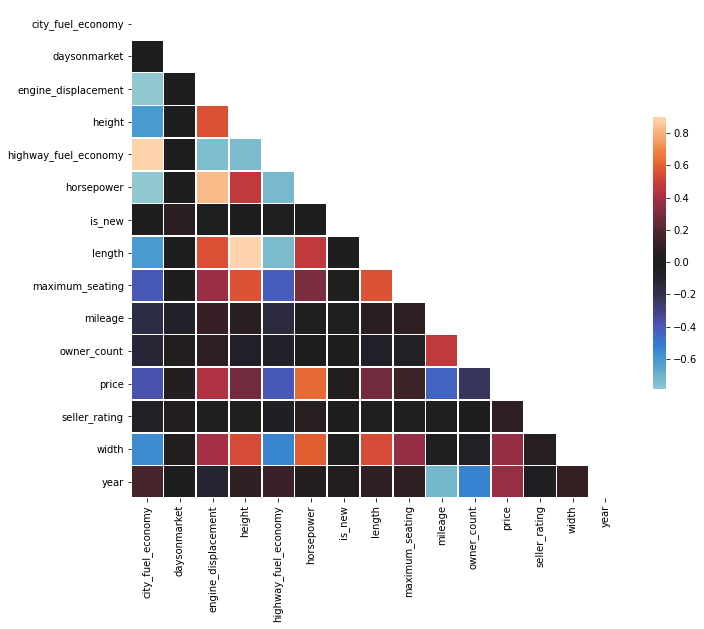

In [42]:
###Creating the Heatmap from the Post
mask = np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig = plt.figure(figsize=(11, 10))
sns.heatmap(cormat, mask=mask, vmax=.9, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

### Visualize Attributes

### Visualization with Raincloud Plot 

In [43]:
%matplotlib inline
ax = pt.RainCloud(x = 'has_accidents', y = 'price', 
                  data = df_final, 
                  width_viol =  .5,
                  width_box =  .9,
                  orient = 'h',
                  move = .0)

NameError: name 'pt' is not defined

In [ ]:
ax = pt.RainCloud(x = 'is_new', y = 'price', 
                  data = df_final, 
                  width_viol = .9,
                  width_box = 3,
                  orient = 'h',
                  move = .0)

In [ ]:
## This shows the new car is more expensive than used car, the car had accident is less expensive than the car without accident

### Visualization with Pairplot using Seaborn

In [ ]:
cols = ['price', 'city_fuel_economy','engine_displacement','highway_fuel_economy','horsepower','mileage']
ax = sns.pairplot(df_final, vars=cols, hue='has_accidents')

In [ ]:
## From above result, we rerun it again without city fuel economy and highway_fuel economy
cols = ['price', 'engine_displacement','horsepower','mileage','maximum_seating','owner_count','seller_rating','year']
ax = sns.pairplot(df_final, vars=cols, hue='has_accidents')

###### Summary: The most significant attributes to the price are horsepower, mileage, year, highway_fuel_economy, engine_displacement, possible attributes are owner_count and seller_rating.

In [ ]:
# Visualize the horsepower and price with Scatter plot using Seaborn lmplot.
sns.lmplot(x='horsepower', y='price', hue='has_accidents', data=df_final)

###### It shows positive relationship between horsepower and price

In [ ]:
# Visualize the engine_displacement and price with Scatter plot using Seaborn lmplot.
sns.lmplot(x='engine_displacement', y='price', hue='has_accidents', data=df_final)

###### This shows positve relationship as well between price and engine_displacement

In [ ]:
# Visualize the higway_fuel_economy and price with Scatter plot using Seaborn lmplot.
sns.lmplot(x='highway_fuel_economy', y='price', hue='has_accidents', data=df_final)

###### This shows negtive relationship as well between price and highway_fuel_economy
The lower the mileage, the higher the price, and that goes with the general notion. However, the relation breaks when the mileage goes beyond 50k as the price does not vary much from that point. 

In [ ]:
# Visualize the relationship between mileage and price with Scatter plot using Seaborn lmplot.
sns.lmplot(x='mileage', y='price', hue='has_accidents',palette="Set1", markers='+', data=df_final)

###### This shows negtive relationship as well between price and mileage

### Explore Joint Attributes

When it comes to joint attributes, we would like to see if there's correlation between "car body type" and "city_fuel_economy".

First, we asked: 

*What's the most popular **city fuel economy** for used SUV, pickup Truck, sedan and convertible?* (Please see Diagram 1)
* The most popular "city fuel economy" for **used Car** overall is 18 mile
* The most popular "city fuel economy" for **used SUV** is 22 mile
* The most popular "city fuel economy" for **used Pickup Truck** is 15 mile
* The most popular "city fuel economy" for **used Sedan** is 28 mile
* The most popular "city fuel economy" for **used convertible** is 20 mile

<AxesSubplot:title={'center':'Diagram 1'}, xlabel='city_fuel_economy', ylabel='total number of used car sold'>

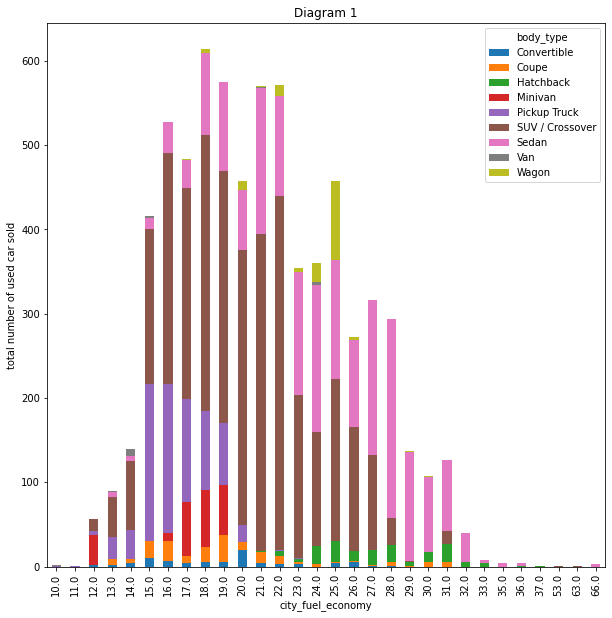

In [44]:
df_graph1 = df_final.groupby(['city_fuel_economy', 'body_type'])['body_type'].count().unstack().fillna(0)
df_graph1.plot(figsize=(10,10), kind="bar", stacked = True, ylabel = "total number of used car sold", title = "Diagram 1")

Another question we asked was:

*What's the **highest amount of seating** people are looking for when looking to buy a used car?* (Please see Diagram 2)

* The **most popular** number of seats for used cars is 5 seats
* The **second most popular** number of seats for used car is 6 seats
* When buying a Sedan, customers mostly are looking for 5 seats.

<AxesSubplot:title={'center':'Diagram 2'}, xlabel='maximum_seating', ylabel='total number of used car sold'>

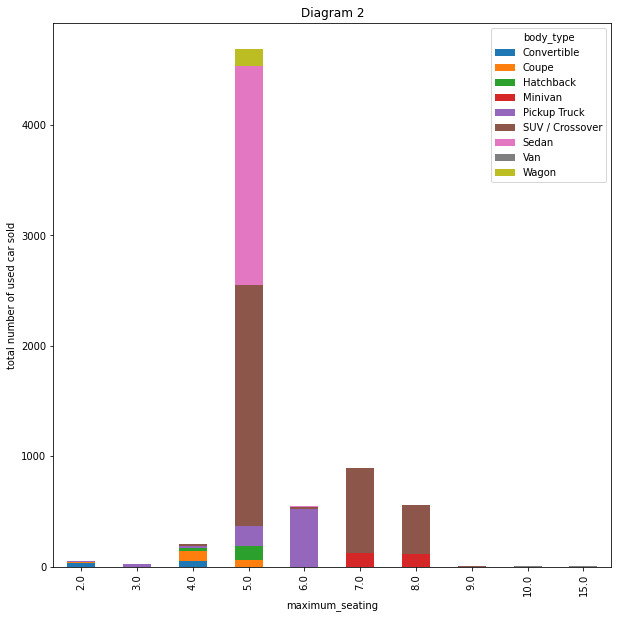

In [45]:
df_graph2 = df_final.groupby(['maximum_seating', 'body_type'])['body_type'].count().unstack().fillna(0)
df_graph2.plot(figsize=(10,10), kind="bar", stacked = True, ylabel = "total number of used car sold", title = "Diagram 2")

### Explore Attributes and Class
we are using price (for regression), has_accidents(for logistic regression) and body_type(for multiclass classifications) as the response variables. In this section, we will try to find some interesting relations involving these features. 

'has-accidents' and 'is_new' are two booleans variables in our final dataset. We could have either or these these two values for the binary classification. But has_accidents feature is more balanced (false: 87% and true:13%) than that of is_new. That is the another driver, besides what is stated in the Business Understanding section, why we leaned on has_accidents for the binary response variable. However, we could have used is_new for the response variable. In that case, we should downscale or upscale, though the downscaling is preferred, training data, which would be an additional step. 

In [111]:
print('--attribute counts of is_new--')
print(df_final['is_new'].value_counts())

print('--attribute counts of has_accidents--')
print(df_final['has_accidents'].value_counts())

--attribute counts of is_new--
False    697322
True        667
Name: is_new, dtype: int64
--attribute counts of has_accidents--
False    613283
True      84706
Name: has_accidents, dtype: int64


One may think the drivers of Sendan, Minivan or wagon may be more cautious that those who drive SUV or Pickup Truck. But at least based on used car market as presented in this visual, there is not much difference in the driving behavior amoung drives of different body types. However, the drivers of coupe and convertible exhibit restriant while on the road because the damage of their vehicle would cost them dearly.

[Text(0, 0, 'Sedan'),
 Text(1, 0, 'Coupe'),
 Text(2, 0, 'SUV / Crossover'),
 Text(3, 0, 'Pickup Truck'),
 Text(4, 0, 'Wagon'),
 Text(5, 0, 'Minivan'),
 Text(6, 0, 'Convertible'),
 Text(7, 0, 'Hatchback'),
 Text(8, 0, 'Van')]

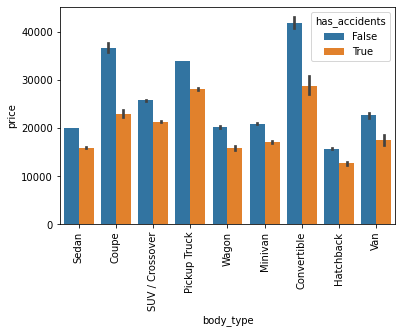

In [112]:
Price_bodytype_accidents = sns.barplot(x="body_type", y="price", hue = "has_accidents",data=df_final)
Price_bodytype_accidents.set_xticklabels(Price_bodytype_accidents.get_xticklabels(), rotation=90)

Coupe, SUV/Crossover, Convertible and Sedan have many outliers, whereas Wagon, Minivan and Vad do not have any outlier. In median used car price of 9 body types are with a close band. 

[Text(0, 0, 'Sedan'),
 Text(1, 0, 'Coupe'),
 Text(2, 0, 'SUV / Crossover'),
 Text(3, 0, 'Pickup Truck'),
 Text(4, 0, 'Wagon'),
 Text(5, 0, 'Minivan'),
 Text(6, 0, 'Convertible'),
 Text(7, 0, 'Hatchback'),
 Text(8, 0, 'Van')]

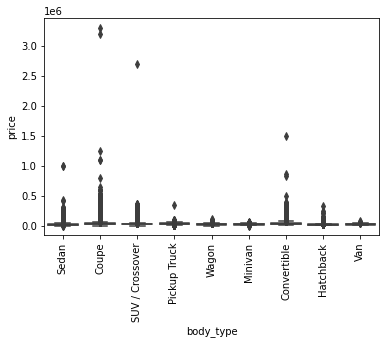

In [113]:
Price_bodytype = sns.boxplot(x="body_type", y="price", data=df_final)
Price_bodytype.set_xticklabels(Price_bodytype.get_xticklabels(), rotation=90)

Sedan, SUV/Crossover, Pickup Truck stay in the market much loger than Coupe, Wagon and Hackback do. It is surprise to see that Coupe, though it is an expensive category car, sells faster Sedan, which we believe a common people's car. Most likely supply demand or mispricing is causing this anamoly. 

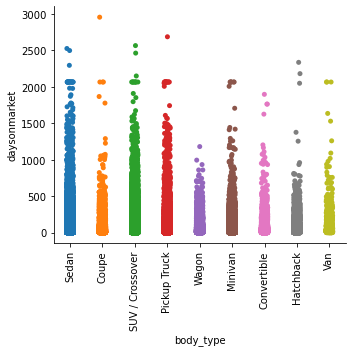

In [114]:
plot = sns.catplot(x="body_type", y="daysonmarket", data=df_final)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

We may think that the used cars having accidents will stay longer in the market, but that is not the case with an exception of Van. 

[Text(0, 0, 'Sedan'),
 Text(1, 0, 'Coupe'),
 Text(2, 0, 'SUV / Crossover'),
 Text(3, 0, 'Pickup Truck'),
 Text(4, 0, 'Wagon'),
 Text(5, 0, 'Minivan'),
 Text(6, 0, 'Convertible'),
 Text(7, 0, 'Hatchback'),
 Text(8, 0, 'Van')]

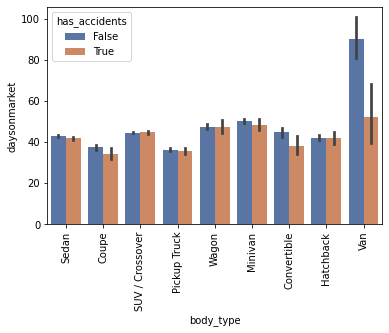

In [116]:
Plt3 = sns.barplot(x="body_type", y="daysonmarket", hue = "has_accidents", palette="deep",data=df_final)
Plt3.set_xticklabels(Plt3.get_xticklabels(), rotation=90)

### New Features

We further group numerical predictors, including "price", to help us to gain more insight. 

This new feature is created using the attribute 'price'. 
We divide price into different price groups as following:

* "<5000"          : price < 5000
* "5000-10000"     : 5000 <= price <= 10000
* "10000-15000"    : 10000 < price <= 15000
* "15000-20000"    : 15000 < price <= 20000
* "20000-25000"    : 20000 < price <= 25000
* "25000 and over" : price > 25000

In [ ]:
price_group = []
for price in df_final["price"]:
    if price < 5000:
        price_group.append("<5000")
    elif 5000 <= price <= 10000:
        price_group.append("5000-10000")
    elif 10000 < price <= 15000:
        price_group.append("10000-15000")
    elif 15000 < price <= 20000:
        price_group.append("15000-20000")
    elif 20000 < price <= 25000:
        price_group.append("20000-25000")
    else:
        price_group.append("25000 and over")

In [ ]:
new_df_price = df_final.copy()
new_df_price["price_group"] = price_group
del new_df_price["price"]
sns.catplot(x="price_group", y= "body_type", kind="bar", data=new_df_price)

Obervations after we had used the new price group for data analysing:
* Over 65% of customers spent 25000 and more when buying a used Pickup truck
* Over 50% of customers spent over 20000 for a used SUV
* Over 50% of customers spent between 10000-20000 when buying a used sedan

In [ ]:
df_price = pd.crosstab(new_df_price.body_type, new_df_price.price_group)
df_price.plot(figsize=(10,10), kind="bar", stacked = True)

### Exceptional Work

In this section, we will use *one hot encoding* to encode the data set below

First, we encode the categorical features as numbers. (see below function) 

In [104]:
def number_encode_features(df_final):
    result = df_final.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

Below shows a snap shot of what the final data looks like after categorical data has been encoded.
You can see the body type is in a numerical representation, instead of a string (object) type, before being encoded.

As indicated in the heatmap in the sample statistics (above) section, in the future we want to further explore the strong correlation between "price" and "body_type".

In [ ]:
encoded_data, encoders = number_encode_features(df_final)
new_series = encoded_data["body_type"]
encoded_data.tail(5)